# `iris & ...`

# `Import`

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification, make_blobs, make_circles
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import precision_score

# `Dataset`

### `Dataset iris`

In [3]:
X, y = load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X[:, [0, 3]], y, test_size=0.2, random_state=12, stratify=y)
x_train.shape, x_test.shape

((120, 2), (30, 2))

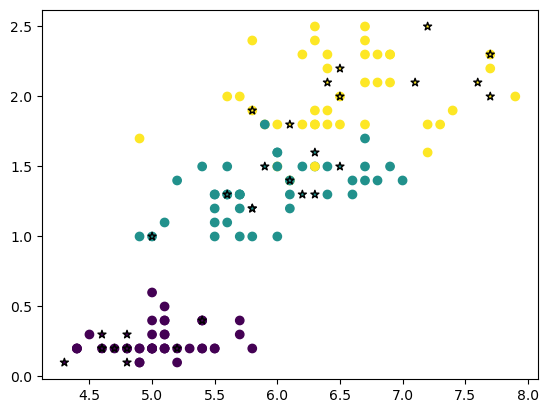

In [5]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, marker='*', edgecolors='k')

In [6]:
model = LogisticRegression(multi_class='multinomial', penalty=None, max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', penalty=None)

In [7]:
model.score(x_test, y_test)

1.0

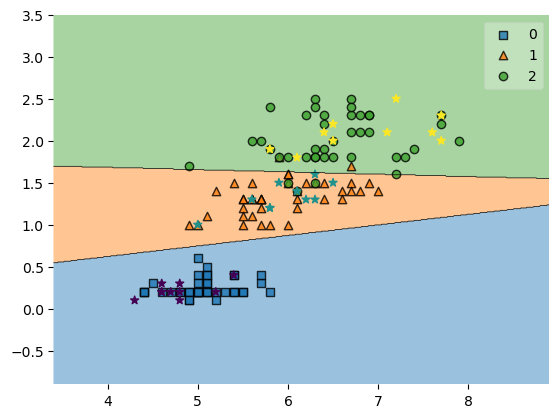

In [8]:
plot_decision_regions(x_train, y_train, clf=model)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, marker='*')

In [9]:
y_hat = model.predict(x_test)
confusion_matrix(y_test, y_hat)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

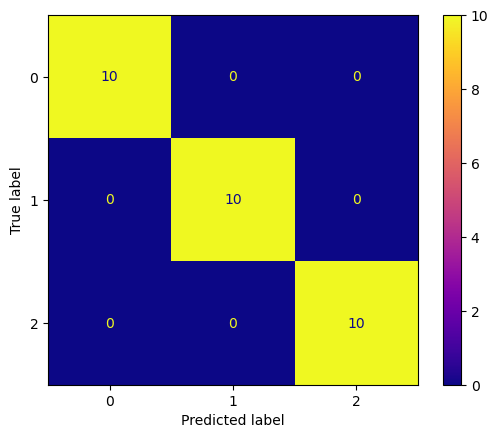

In [10]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat, cmap='plasma')

In [13]:
print (precision_score(y_test, y_hat, average=None))
print (precision_score(y_test, y_hat, average='weighted'))

[1. 1. 1.]
1.0


### `Dataset 1 `

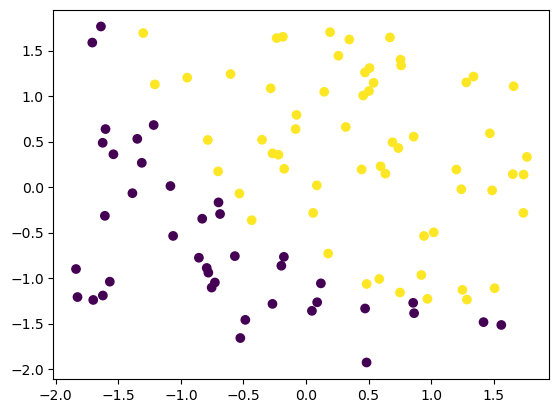

In [17]:
data = np.loadtxt(r'ex2data1.txt', delimiter=',')
data.shape

X = data[:, :-1].copy()
y = data[:, -1].copy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], c=y)

In [18]:
model_ = make_pipeline(PolynomialFeatures(degree=2, interaction_only=True),
                    LogisticRegression())
model_.fit(X, y)   

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('logisticregression', LogisticRegression())])

<Axes: >

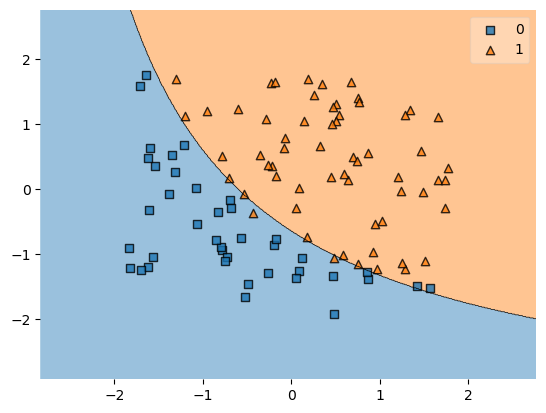

In [19]:
plot_decision_regions(X, y.astype(np.int_), clf=model_)

### `Dataset 2`

In [20]:
data1 = pd.read_csv(r'ex2data2.txt')
data1 = np.array(data1)
data1.shape

(117, 3)

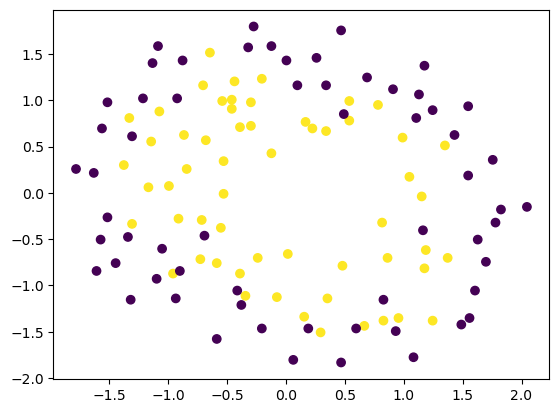

In [21]:
X = data1[:, :-1].copy()
y = data1[:, -1].copy()
scaler = StandardScaler()
X = scaler.fit_transform(X)
plt.scatter(X[:, 0], X[:, 1], c=y);

In [22]:
model__ = make_pipeline(PolynomialFeatures(degree=4),
                      LogisticRegression(penalty=None, max_iter=5000, random_state=42, tol=1e-4))
model__.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('logisticregression',
                 LogisticRegression(max_iter=5000, penalty=None,
                                    random_state=42))])

In [23]:
model__.score(X, y)

0.8461538461538461

<Axes: >

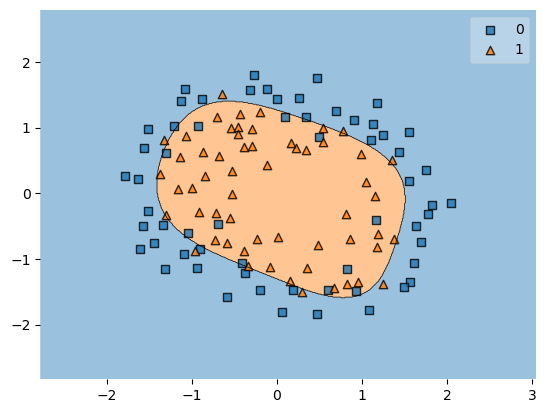

In [24]:
plot_decision_regions(X, y.astype(np.int_), clf=model__)

### `Dataset 3`

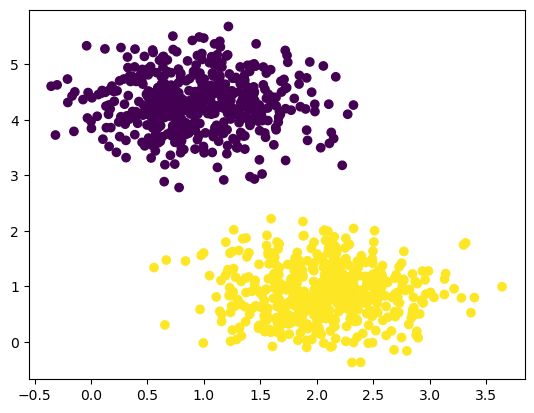

In [25]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0, cluster_std=0.5)
X.shape, y.shape

plt.scatter(X[:, 0], X[:, 1], c=y)

In [26]:
model_1 = LogisticRegression()
model_1.fit(X, y)

LogisticRegression()

In [27]:
model_1.score(X,y)

1.0

In [28]:
print ('class 0: ', model_1.score(X[y==0], y[y==0]))
print ('class 1: ', model_1.score(X[y==1], y[y==1]))

class 0:  1.0
class 1:  1.0


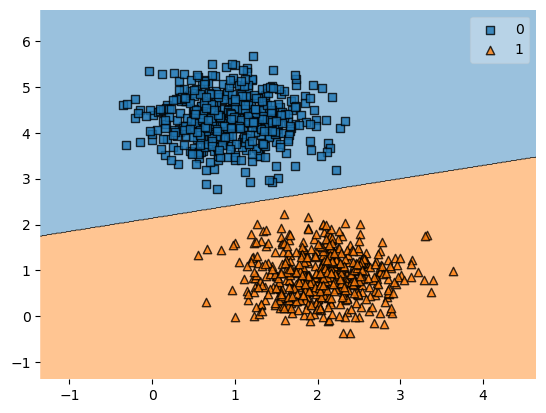

In [29]:
plot_decision_regions(X, y, clf=model_1);

##### `END`